# Data Mining HW1

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np
from pandas.tseries.offsets import Minute

style.use('ggplot')

## 1. Define transaction:
### (1)Taipei 台北(Temperature, PowerSupply)
This is the transaction according to TA's assignment


                     NorthSupply  Temp
Datetime                              
2016-09-27 12:00:00        648.4  26.3
2016-09-27 13:00:00        601.3  25.6
2016-09-27 14:00:00        500.9  24.9
2016-09-27 15:00:00        516.1  24.1
2016-09-27 16:00:00        530.2  25.3


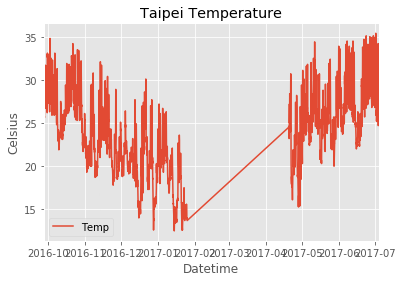

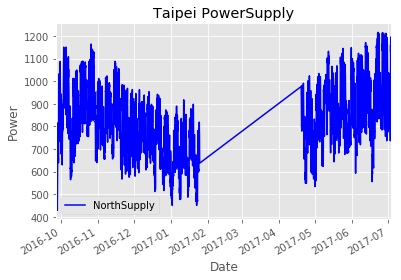

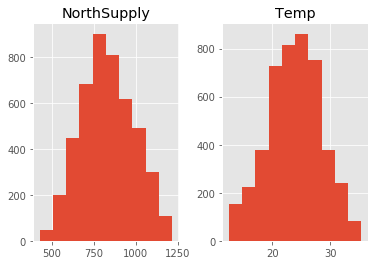

In [2]:
df_weather = pd.read_csv('Weather.csv')
df_power = pd.read_csv('Power.csv')

# get all Temp data of Taipei from Weather.csv
Taipei = df_weather.loc[df_weather.Location == 'TAIPEI',['Timestamp','Temp']]
Taipei = Taipei.loc[Taipei.Timestamp >= '2016-01-01 00:00:00', :]
Taipei = Taipei.loc[Taipei.Timestamp <= '2017-12-31 23:59:59', :]
Taipei['Datetime'] = pd.to_datetime(Taipei['Timestamp'])
# eliminate duplicate index value
Taipei = Taipei.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Taipei = Taipei.drop(['Timestamp'],axis=1)

# get all PowerSupply data of (North)Taipei from Power.csv
Taipei_power = df_power.loc[df_power.Timestamp >= '2016-01-01 00:00:00', ['Timestamp','NorthSupply']]
Taipei_power = Taipei_power.loc[Taipei_power.Timestamp <= '2017-12-31 23:59:59', :]
Taipei_power['Datetime'] = pd.to_datetime(Taipei_power['Timestamp'])
# eliminate duplicate index value
Taipei_power = Taipei_power.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Taipei_power = Taipei_power.drop(['Timestamp'],axis=1)
# data alignment
Taipei_power.index = Taipei_power.index - Minute(10)

# merge two dataset into single table
result = pd.concat([Taipei_power, Taipei], axis=1)
result = result.dropna()

result_2 = pd.DataFrame.copy(result)

plt.figure()
plt.title('Taipei Temperature')
plt.xlabel('Date')
plt.ylabel('Celsius')
result['Temp'].plot(subplots=True);
plt.legend()


plt.figure()
plt.title('Taipei PowerSupply')
result['NorthSupply'].plot(color='blue')
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()


result.hist()

print result.head()

由折線圖的比較可以看出兩者有一定的趨勢，利用Histogram畫出來兩者資料分佈狀態也接近Gaussian Distribution，因此我認為這兩者之間應該可以找到一些有意義的Rule

### (2) Taitung 台東(Temp,PowerUsage, PowerSupply)

                     EastSupply  EastUsage  Temp
Datetime                                        
2016-09-27 12:00:00        14.0       29.3  26.9
2016-09-27 13:00:00        14.0       27.6  26.4
2016-09-27 14:00:00        13.9       27.9  34.8
2016-09-27 15:00:00        13.9       29.5  33.0
2016-09-27 16:00:00         8.7       31.0  30.8


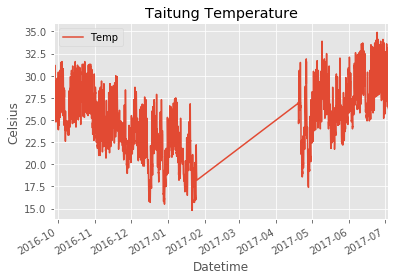

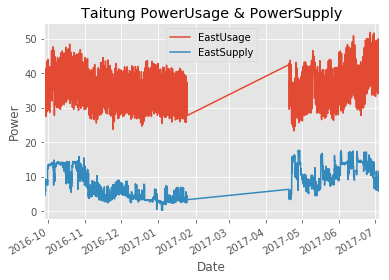

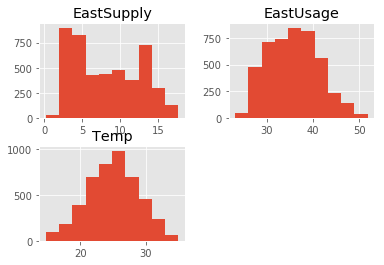

In [3]:
# get all Temp data of Taitung from Weather.csv
Taitung = df_weather.loc[df_weather.Location == 'TAITUNG',['Timestamp','Temp']]
Taitung = Taitung.loc[Taitung.Timestamp >= '2016-01-01 00:00:00', :]
Taitung = Taitung.loc[Taitung.Timestamp <= '2017-12-31 23:59:59', :]
Taitung['Datetime'] = pd.to_datetime(Taitung['Timestamp'])

# eliminate duplicate index value
Taitung = Taitung.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Taitung = Taitung.drop(['Timestamp'],axis=1)


# get all PowerSupply data of (East)Taitung from Power.csv
Taitung_power = df_power.loc[df_power.Timestamp >= '2016-01-01 00:00:00', ['Timestamp','EastSupply','EastUsage']]
Taitung_power = Taitung_power.loc[Taitung_power.Timestamp <= '2017-12-31 23:59:59', :]
Taitung_power['Datetime'] = pd.to_datetime(Taitung_power['Timestamp'])

# eliminate duplicate index value
Taitung_power = Taitung_power.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Taitung_power = Taitung_power.drop(['Timestamp'],axis=1)
# data alignment
Taitung_power.index = Taitung_power.index - Minute(10)

# merge two dataset into single table
Taitung = pd.concat([Taitung_power, Taitung], axis=1)
# eliminate missing interval data
Taitung = Taitung.dropna()
Taitung_2 = pd.DataFrame.copy(Taitung)

plt.figure()
plt.title('Taitung Temperature')
plt.xlabel('Date')
plt.ylabel('Celsius')
Taitung['Temp'].plot()
plt.legend()

plt.figure()
plt.title('Taitung PowerUsage & PowerSupply')
Taitung['EastUsage'].plot()
Taitung['EastSupply'].plot()
plt.xlabel('Date')
plt.ylabel('Power')
plt.legend()

Taitung.hist()

print Taitung.head()

可以發現台東的PowerSupply、Usage本身的data distribution比較紊亂一點，猜測的原因是東區的Power量本身不大，因此當有差異性時會表現得比較明顯。但仍可以發現，Temperature與Power的也存在正相關，因此我認為也有機會找到有用的Rule。

### (3) Tamsui 淡水(Rela_Humid, Temperature)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10c0353d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x10bf670d0>]], dtype=object)

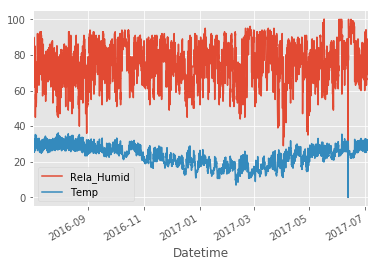

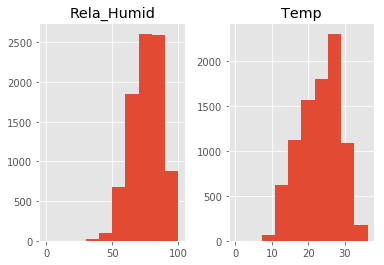

In [4]:
Tamsui = df_weather.loc[df_weather.Location == 'TAMSUI',['Timestamp','Rela_Humid','Temp']]
Tamsui = Tamsui.loc[Tamsui.Timestamp >= '2016-01-01 00:00:00', :]
Tamsui = Tamsui.loc[Tamsui.Timestamp <= '2017-12-31 23:59:59', :]
Tamsui['Datetime'] = pd.to_datetime(Tamsui['Timestamp'])

# eliminate duplicate index value
Tamsui = Tamsui.drop_duplicates(subset='Timestamp', keep='last').set_index('Datetime')
Tamsui = Tamsui.drop(['Timestamp'],axis=1)
Tamsui_2 = pd.DataFrame.copy(Tamsui)

plt.figure()
Tamsui.plot()

Tamsui.hist()


這邊我將淡水的Relative Humid與Temperature做為Transaction去發掘Rules,從折線圖上發現Relative Humid的趨勢不太明顯，幾乎是平穩地在75%上下，相對的Temperature就比較變化一點，從Histogram也可以看出Temperature的分佈比較分散，而Relative Humid比較集中。

## 2. Define two discretization of transaction:
### (1)Taipei(Temp, PowerSupply):

    a.(Temp, PowerUsage) divided by (5,200)
    b.(Temp, PowerUsage) divided by (5,50)

                         NorthSupply      Temp
Datetime                                      
2016-09-27 12:00:00  PowerSupply:3.0  Temp:5.0
2016-09-27 13:00:00  PowerSupply:3.0  Temp:5.0
2016-09-27 14:00:00  PowerSupply:3.0  Temp:5.0
2016-09-27 15:00:00  PowerSupply:3.0  Temp:5.0
2016-09-27 16:00:00  PowerSupply:3.0  Temp:5.0


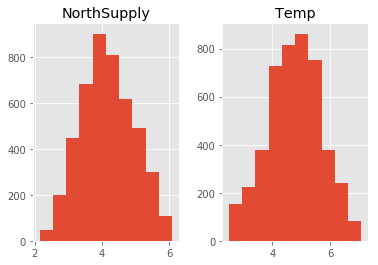

In [5]:
result['Temp'] = result['Temp']/5
result['NorthSupply'] = result['NorthSupply']/200
result.hist()

result['Temp'] = 'Temp:' + (result['Temp']).round().astype(str)
result['NorthSupply'] = 'PowerSupply:' + (result['NorthSupply']).round().astype(str)
print result.head()

經過了(Temp, PowerSupply) divided by (5, 200) --> 發現兩者的Histogram分佈可以說相當接近，我認為這樣把它做discretization有機會找到Support & Confidence同時很大的Rule，在Rule Mining過程中可以找到比較多Rule來研究是否有意義。

                          NorthSupply      Temp
Datetime                                       
2016-09-27 12:00:00  PowerSupply:13.0  Temp:5.0
2016-09-27 13:00:00  PowerSupply:12.0  Temp:5.0
2016-09-27 14:00:00  PowerSupply:10.0  Temp:5.0
2016-09-27 15:00:00  PowerSupply:10.0  Temp:5.0
2016-09-27 16:00:00  PowerSupply:11.0  Temp:5.0


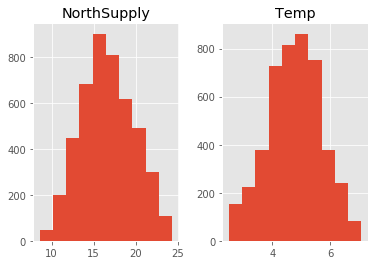

In [6]:
result_2['Temp'] = result_2['Temp']/5
result_2['NorthSupply'] = result_2['NorthSupply']/50
result_2.hist()

result_2['Temp'] = 'Temp:' + (result_2['Temp']).round().astype(str)
result_2['NorthSupply'] = 'PowerSupply:' + (result_2['NorthSupply']).round().astype(str)
print result_2.head()

經過了(Temp, PowerSupply) divided by (5, 50) --> 可以發現PowerSupply的部份因為divid不夠多，因此資料會比較分散，但是同時代表，若能找到Rule，這個Rule本身的意義會更有代表性。

In [7]:
result.to_csv('out.csv', encoding='utf-8', index=False)
result_2.to_csv('out_2.csv', encoding='utf-8', index=False)

### (2) Taitung(PowerSupply, PowerUsage, Temperature):
    a.(PowerSupply, PowerUsage, Temperature) divided by (5, 5, 5)
    b.(PowerSupply, PowerUsage, Temperature) divided by (5, 10, 5)

                           EastSupply        EastUsage       Temp
Datetime                                                         
2016-09-27 12:00:00  PowerSupply: 3.0  PowerUsage: 6.0  Temp: 5.0
2016-09-27 13:00:00  PowerSupply: 3.0  PowerUsage: 6.0  Temp: 5.0
2016-09-27 14:00:00  PowerSupply: 3.0  PowerUsage: 6.0  Temp: 7.0
2016-09-27 15:00:00  PowerSupply: 3.0  PowerUsage: 6.0  Temp: 7.0
2016-09-27 16:00:00  PowerSupply: 2.0  PowerUsage: 6.0  Temp: 6.0


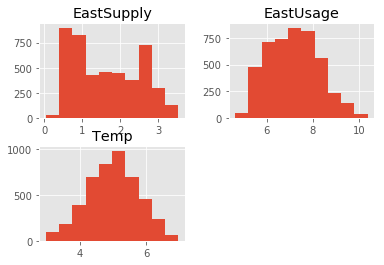

In [8]:
#Temp = Taitung['Temp']

Taitung['Temp'] = Taitung['Temp']/5
Taitung['EastSupply'] = Taitung['EastSupply']/5
Taitung['EastUsage'] = Taitung['EastUsage']/5
Taitung.hist()



Taitung['Temp'] = 'Temp: ' + (Taitung['Temp']).round().astype(str)
Taitung['EastSupply'] = 'PowerSupply: ' + (Taitung['EastSupply']).round().astype(str)
Taitung['EastUsage'] = 'PowerUsage: ' + (Taitung['EastUsage']).round().astype(str)
print Taitung.head()

這部分我採用 (PowerSupply, PowerUsage, Temperature) divided by (5, 5, 5) 的方式去Discretization
因為PowerSupply、Usage本身的資料分佈就不寬，除的數字也不能太大，否則所有的data都會變成同一種。

                           EastSupply        EastUsage       Temp
Datetime                                                         
2016-09-27 12:00:00  PowerSupply: 3.0  PowerUsage: 3.0  Temp: 5.0
2016-09-27 13:00:00  PowerSupply: 3.0  PowerUsage: 3.0  Temp: 5.0
2016-09-27 14:00:00  PowerSupply: 3.0  PowerUsage: 3.0  Temp: 7.0
2016-09-27 15:00:00  PowerSupply: 3.0  PowerUsage: 3.0  Temp: 7.0
2016-09-27 16:00:00  PowerSupply: 2.0  PowerUsage: 3.0  Temp: 6.0


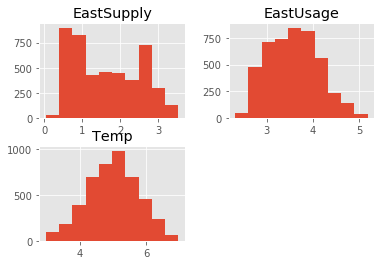

In [9]:
Taitung_2['Temp'] = Taitung_2['Temp']/5
Taitung_2['EastSupply'] = Taitung_2['EastSupply']/5
Taitung_2['EastUsage'] = Taitung_2['EastUsage']/10
Taitung_2.hist()

Taitung_2['Temp'] = 'Temp: ' + (Taitung_2['Temp']).round().astype(str)
Taitung_2['EastSupply'] = 'PowerSupply: ' + (Taitung_2['EastSupply']).round().astype(str)
Taitung_2['EastUsage'] = 'PowerUsage: ' + (Taitung_2['EastUsage']).round().astype(str)
print Taitung_2.head()

這部分我採用 (PowerSupply, PowerUsage, Temperature) divided by (5, 10, 5) 的方式去Discretization，把Usage的data從divided by 5變成divided by 10，相對前面的histogram發現Usage的分佈是相對分散的，所以我把Usage在集中一點，希望在接下來能比較容易符合Support、Confidence。

In [10]:
Taitung.to_csv('taitung.csv', encoding='utf-8', index=False)
Taitung_2.to_csv('taitung_2.csv', encoding='utf-8', index=False)

### (3) Tamsui(Relative Humid, Temperature):
    a.(Relative Humid, Temperature) divided by (5,10)
    b.(Relative Humid, Temperature) divided by (10,10)

                          Rela_Humid      Temp
Datetime                                      
2016-07-03 01:00:00  Rela_Humid: 8.0  Temp:5.0
2016-07-03 02:00:00  Rela_Humid: 8.0  Temp:5.0
2016-07-03 03:00:00  Rela_Humid: 8.0  Temp:5.0
2016-07-03 04:00:00  Rela_Humid: 8.0  Temp:5.0
2016-07-03 05:00:00  Rela_Humid: 9.0  Temp:5.0


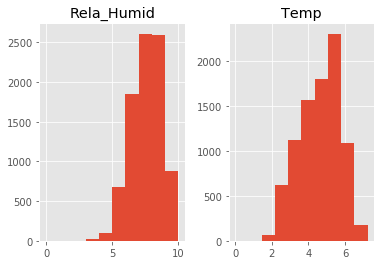

In [11]:
Tamsui['Rela_Humid'] = Tamsui['Rela_Humid']/10
Tamsui['Temp'] = Tamsui['Temp']/5
Tamsui.hist()

Tamsui['Rela_Humid'] = 'Rela_Humid: ' + (Tamsui['Rela_Humid']).round().astype(str)
Tamsui['Temp'] = 'Temp:' + (Tamsui['Temp']).round().astype(str)
print Tamsui.head()

這部分我採用 (Relative Humid, Temperature) divided by (5,10) 的方式去Discretization，可以透過Histogram看出資料分佈相當接近，因此比較機會找到超過Support、Confidence的Rule。

                          Rela_Humid       Temp
Datetime                                       
2016-07-03 01:00:00  Rela_Humid: 8.0  Temp:10.0
2016-07-03 02:00:00  Rela_Humid: 8.0  Temp:10.0
2016-07-03 03:00:00  Rela_Humid: 8.0  Temp:10.0
2016-07-03 04:00:00  Rela_Humid: 8.0  Temp:10.0
2016-07-03 05:00:00  Rela_Humid: 9.0  Temp:10.0


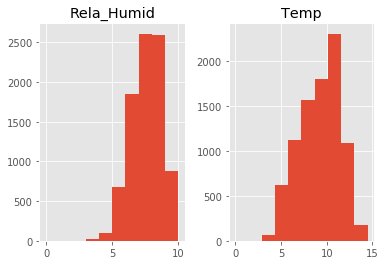

In [12]:
Tamsui_2['Rela_Humid'] = Tamsui_2['Rela_Humid']/10
Tamsui_2['Temp'] = Tamsui_2['Temp']/2.5
Tamsui_2.hist()

Tamsui_2['Rela_Humid'] = 'Rela_Humid: ' + (Tamsui_2['Rela_Humid']).round().astype(str)
Tamsui_2['Temp'] = 'Temp:' + (Tamsui_2['Temp']).round().astype(str)
print Tamsui_2.head()

這部分我採用 (Relative Humid, Temperature) divided by (10,2.5) 的方式去Discretization，可以透過Histogram看出資料分佈在Range的部份比較接近，雖然相比於前面的 divided(10,5) 資料可能會不夠集中，但希望透過這樣可以找到更有意義的Rule。

In [13]:
Tamsui.to_csv('Temp_humid.csv', encoding='utf-8', index=False)
Tamsui_2.to_csv('Temp_humid_2.csv', encoding='utf-8', index=False)

## 3.what algorithm you use:
### Apriori:

<img src="Apriori.jpg">

Note: Apriori Algorithm 我是從https://github.com/asaini/Apriori 這邊clone下來使用

In [30]:
from apriori import *
inFile   = dataFromFile('out.csv')
inFile_2 = dataFromFile('out_2.csv')
# min_support = len(result)*0.04 = 184.4 --> must bigger equal to 185 
# min_confidence = 0.3 
minSupport = 0.05
minConfidence = 0.3
items, rules = runApriori(inFile, minSupport, minConfidence)
items_2, rules_2 = runApriori(inFile_2, minSupport, minConfidence)


inFile_3 = dataFromFile('taitung.csv')
inFile_4 = dataFromFile('taitung_2.csv')
# min_support = len(result)*0.15 = 691.5 --> must bigger equal to 692
# min_confidence = 0.3 
minSupport_2 = 0.15
minConfidence_2 = 0.3
items_3, rules_3 = runApriori(inFile_3, minSupport_2, minConfidence_2)
items_4, rules_4 = runApriori(inFile_4, minSupport_2, minConfidence_2)


inFile_5 = dataFromFile('Temp_humid.csv')
inFile_6 = dataFromFile('Temp_humid_2.csv')
# min_support = len(Tamsui)*0.05 = 218.25 --> must bigger equal to 219
# min_confidence = 0.3 
minSupport_3 = 0.05
minConfidence_3 = 0.3
items_5, rules_5 = runApriori(inFile_5, minSupport_3, minConfidence_3)
items_6, rules_6 = runApriori(inFile_6, minSupport_3, minConfidence_3)

### FP-Growth Algorithm:

<img src="FP_Growth.jpg">

Note: FP-Growth Algorithm我是從https://github.com/enaeseth/python-fp-growth 這邊clone下來使用，特別的是他只有幫我計算出Frequent pattern set的support，Confidence的部份我是參考前面Apriori的方式打出來的，詳情可以到fp_growth.py裡面去看，可以call print_result(toRetRules) 這個 function來看找出來的Rule。

In [31]:
# Run FP-Growth Algorithm
from fp_growth import *
FP_result = run_FPgrowth('out.csv', minSupport, minConfidence)
FP_result_2 = run_FPgrowth('out_2.csv', minSupport, minConfidence)
FP_result_3 = run_FPgrowth('taitung.csv',minSupport_2, minConfidence_2)
FP_result_4 = run_FPgrowth('taitung_2.csv', minSupport_2, minConfidence_2)
FP_result_5 = run_FPgrowth('Temp_humid.csv', minSupport_3, minConfidence_3)
FP_result_6 = run_FPgrowth('Temp_humid_2.csv', minSupport_3, minConfidence_3)

## 4.What rules you discover?

## Taipei 台北(Temperature, PowerSupply)
### a. divided by (5,100)
min_support = len(result)*0.04 = 184.4 --> must bigger equal to 185 <br>
min_confidence = 0.3 

In [32]:
printResults(items, rules)

item: ('PowerSupply:3.0', 'Temp:5.0') , 0.054
item: ('Temp:3.0',) , 0.087
item: ('PowerSupply:3.0', 'Temp:4.0') , 0.100
item: ('Temp:6.0', 'PowerSupply:5.0') , 0.109
item: ('PowerSupply:5.0', 'Temp:5.0') , 0.121
item: ('PowerSupply:4.0', 'Temp:4.0') , 0.151
item: ('Temp:6.0',) , 0.190
item: ('PowerSupply:3.0',) , 0.206
item: ('PowerSupply:4.0', 'Temp:5.0') , 0.216
item: ('PowerSupply:5.0',) , 0.287
item: ('Temp:4.0',) , 0.296
item: ('Temp:5.0',) , 0.397
item: ('PowerSupply:4.0',) , 0.454
Discover RULES:
Rule: ('Temp:5.0',) ==> ('PowerSupply:5.0',) , 0.306
Rule: ('PowerSupply:4.0',) ==> ('Temp:4.0',) , 0.334
Rule: ('Temp:4.0',) ==> ('PowerSupply:3.0',) , 0.337
Rule: ('PowerSupply:5.0',) ==> ('Temp:6.0',) , 0.380
Rule: ('PowerSupply:5.0',) ==> ('Temp:5.0',) , 0.423
Rule: ('PowerSupply:4.0',) ==> ('Temp:5.0',) , 0.476
Rule: ('PowerSupply:3.0',) ==> ('Temp:4.0',) , 0.485
Rule: ('Temp:4.0',) ==> ('PowerSupply:4.0',) , 0.511
Rule: ('Temp:5.0',) ==> ('PowerSupply:4.0',) , 0.544
Rule: ('Temp:6

## Taipei 台北(Temperature, PowerSupply)
### b. divided by (5,50)
min_support = len(result)*0.04 = 184.4 --> must bigger equal to 185 <br>
min_confidence = 0.3

In [33]:
printResults(items_2, rules_2)

item: ('PowerSupply:12.0',) , 0.055
item: ('PowerSupply:17.0', 'Temp:5.0') , 0.056
item: ('PowerSupply:15.0', 'Temp:5.0') , 0.058
item: ('PowerSupply:16.0', 'Temp:5.0') , 0.061
item: ('PowerSupply:21.0',) , 0.061
item: ('PowerSupply:13.0',) , 0.070
item: ('PowerSupply:20.0',) , 0.077
item: ('PowerSupply:19.0',) , 0.081
item: ('Temp:3.0',) , 0.087
item: ('PowerSupply:14.0',) , 0.088
item: ('PowerSupply:18.0',) , 0.097
item: ('PowerSupply:17.0',) , 0.117
item: ('PowerSupply:16.0',) , 0.121
item: ('PowerSupply:15.0',) , 0.122
item: ('Temp:6.0',) , 0.190
item: ('Temp:4.0',) , 0.296
item: ('Temp:5.0',) , 0.397
Discover RULES:
Rule: ('PowerSupply:15.0',) ==> ('Temp:5.0',) , 0.476
Rule: ('PowerSupply:17.0',) ==> ('Temp:5.0',) , 0.477
Rule: ('PowerSupply:16.0',) ==> ('Temp:5.0',) , 0.504


## Taitung 台東(Temp,PowerUsage, PowerSupply)
### a. (PowerSupply, PowerUsage, Temperature) divided by (5, 5, 5)
min_support = len(result)*0.15 = 691.5 --> must bigger equal to 692 <br>
min_confidence = 0.3 

In [34]:
printResults(items_3, rules_3)

item: ('PowerUsage: 7.0', 'PowerSupply: 1.0') , 0.166
item: ('Temp: 4.0', 'PowerSupply: 1.0') , 0.172
item: ('PowerUsage: 7.0', 'Temp: 5.0') , 0.173
item: ('Temp: 5.0', 'PowerSupply: 1.0') , 0.199
item: ('Temp: 4.0',) , 0.232
item: ('PowerSupply: 3.0',) , 0.241
item: ('Temp: 6.0',) , 0.245
item: ('PowerUsage: 6.0',) , 0.268
item: ('PowerSupply: 2.0',) , 0.271
item: ('PowerUsage: 8.0',) , 0.277
item: ('PowerUsage: 7.0',) , 0.303
item: ('PowerSupply: 1.0',) , 0.450
item: ('Temp: 5.0',) , 0.473
Discover RULES:
Rule: ('Temp: 5.0',) ==> ('PowerUsage: 7.0',) , 0.366
Rule: ('PowerSupply: 1.0',) ==> ('PowerUsage: 7.0',) , 0.369
Rule: ('PowerSupply: 1.0',) ==> ('Temp: 4.0',) , 0.382
Rule: ('Temp: 5.0',) ==> ('PowerSupply: 1.0',) , 0.421
Rule: ('PowerSupply: 1.0',) ==> ('Temp: 5.0',) , 0.442
Rule: ('PowerUsage: 7.0',) ==> ('PowerSupply: 1.0',) , 0.548
Rule: ('PowerUsage: 7.0',) ==> ('Temp: 5.0',) , 0.571
Rule: ('Temp: 4.0',) ==> ('PowerSupply: 1.0',) , 0.740


## Taitung 台東(Temp,PowerUsage, PowerSupply)
### b. (PowerSupply, PowerUsage, Temperature) divided by (5, 10, 5)
min_support = len(result)*0.15 = 691.5 --> must bigger equal to 692 <br>
min_confidence = 0.3 

In [35]:
printResults(items_4, rules_4)

item: ('PowerSupply: 2.0', 'PowerUsage: 4.0') , 0.154
item: ('Temp: 4.0', 'PowerUsage: 3.0') , 0.159
item: ('Temp: 4.0', 'PowerSupply: 1.0') , 0.172
item: ('Temp: 6.0', 'PowerUsage: 4.0') , 0.182
item: ('PowerSupply: 1.0', 'PowerUsage: 4.0') , 0.197
item: ('Temp: 5.0', 'PowerSupply: 1.0') , 0.199
item: ('Temp: 5.0', 'PowerUsage: 4.0') , 0.231
item: ('Temp: 4.0',) , 0.232
item: ('PowerUsage: 3.0', 'Temp: 5.0') , 0.238
item: ('PowerSupply: 3.0',) , 0.241
item: ('Temp: 6.0',) , 0.245
item: ('PowerUsage: 3.0', 'PowerSupply: 1.0') , 0.249
item: ('PowerSupply: 2.0',) , 0.271
item: ('PowerUsage: 3.0',) , 0.447
item: ('PowerSupply: 1.0',) , 0.450
item: ('Temp: 5.0',) , 0.473
item: ('PowerUsage: 4.0',) , 0.497
Discover RULES:
Rule: ('PowerUsage: 4.0',) ==> ('PowerSupply: 2.0',) , 0.310
Rule: ('PowerUsage: 3.0',) ==> ('Temp: 4.0',) , 0.355
Rule: ('PowerUsage: 4.0',) ==> ('Temp: 6.0',) , 0.366
Rule: ('PowerSupply: 1.0',) ==> ('Temp: 4.0',) , 0.382
Rule: ('PowerUsage: 4.0',) ==> ('PowerSupply: 1.0

## Tamsui 淡水(Rela_Humid, Temperature)
### a. (Relative Humid, Temperature) divided by (5,10)
min_support = len(Tamsui)*0.05 = 218.25 --> must bigger equal to 219 <br>
min_confidence = 0.3 

In [36]:
printResults(items_5, rules_5)

item: ('Temp:4.0', 'Rela_Humid: 7.0') , 0.050
item: ('Temp:6.0', 'Rela_Humid: 6.0') , 0.053
item: ('Rela_Humid: 9.0', 'Temp:4.0') , 0.059
item: ('Rela_Humid: 7.0', 'Temp:5.0') , 0.062
item: ('Temp:6.0', 'Rela_Humid: 8.0') , 0.068
item: ('Rela_Humid: 9.0', 'Temp:5.0') , 0.085
item: ('Temp:4.0', 'Rela_Humid: 8.0') , 0.086
item: ('Temp:6.0', 'Rela_Humid: 7.0') , 0.096
item: ('Rela_Humid: 8.0', 'Temp:5.0') , 0.131
item: ('Temp:3.0',) , 0.150
item: ('Rela_Humid: 6.0',) , 0.159
item: ('Rela_Humid: 9.0',) , 0.205
item: ('Temp:6.0',) , 0.224
item: ('Rela_Humid: 7.0',) , 0.248
item: ('Temp:4.0',) , 0.248
item: ('Rela_Humid: 8.0',) , 0.330
item: ('Temp:5.0',) , 0.332
Discover RULES:
Rule: ('Temp:6.0',) ==> ('Rela_Humid: 8.0',) , 0.303
Rule: ('Rela_Humid: 6.0',) ==> ('Temp:6.0',) , 0.330
Rule: ('Temp:4.0',) ==> ('Rela_Humid: 8.0',) , 0.348
Rule: ('Rela_Humid: 7.0',) ==> ('Temp:6.0',) , 0.388
Rule: ('Temp:5.0',) ==> ('Rela_Humid: 8.0',) , 0.395
Rule: ('Rela_Humid: 8.0',) ==> ('Temp:5.0',) , 0.397


## Tamsui 淡水(Rela_Humid, Temperature)
### b. (Relative Humid, Temperature) divided by (10,10)
min_support = len(Tamsui)*0.05 = 218.25 --> must bigger equal to 219 <br>
min_confidence = 0.3

In [37]:
printResults(items_6, rules_6)

item: ('Rela_Humid: 9.0', 'Temp:10.0') , 0.050
item: ('Temp:11.0', 'Rela_Humid: 7.0') , 0.051
item: ('Temp:10.0', 'Rela_Humid: 8.0') , 0.060
item: ('Temp:6.0',) , 0.076
item: ('Temp:11.0', 'Rela_Humid: 8.0') , 0.089
item: ('Temp:12.0',) , 0.105
item: ('Temp:7.0',) , 0.113
item: ('Temp:8.0',) , 0.122
item: ('Temp:9.0',) , 0.126
item: ('Rela_Humid: 6.0',) , 0.159
item: ('Temp:10.0',) , 0.170
item: ('Temp:11.0',) , 0.182
item: ('Rela_Humid: 9.0',) , 0.205
item: ('Rela_Humid: 7.0',) , 0.248
item: ('Rela_Humid: 8.0',) , 0.330
Discover RULES:
Rule: ('Temp:10.0',) ==> ('Rela_Humid: 8.0',) , 0.356
Rule: ('Temp:11.0',) ==> ('Rela_Humid: 8.0',) , 0.488


## 5. Time Series Motif Discovery

Definition of Motif : <br> Time series motifs are repeated segments in a long time series that,
if exist, carryprecise information about the underlying source of the time series. <br><br>
Note : Using grammarviz2 java toolkit to implement searching MOTIF <br>
https://github.com/GrammarViz2/grammarviz2_src

<h2 align="center">Taipei Temperature</h2>
<img src="./Time_Series_Data/Taipei_Temp.png" height="500" width="500">
<h2 align="center">Taipei PowerSupply</h2>
<img src="./Time_Series_Data/Taipei_Supply.png" height="500" width="500">
<h2 align="center">Taitung Temperature</h2>
<img src="./Time_Series_Data/Taitung_Temp.png" height="500" width="500">
<h2 align="center">Taitung PowerSupply</h2>
<img src="./Time_Series_Data/Taitung_Supply.png" height="500" width="500">
<h2 align="center">Taitung PowerUsage</h2>
<img src="./Time_Series_Data/Taitung_Usage.png" height="500" width="500">
<h2 align="center">Tamsui Temperature</h2>
<img src="./Time_Series_Data/Tamsui_Temp.png" height="500" width="500">
<h2 align="center">Tamsui Relative Humid</h2>
<img src="./Time_Series_Data/Tamsui_Relative_Humid.png" height="500" width="500">

## 6. What did you learned, and comparison between different methods you use?

    (1)Learn how to select discretization criteria with different kind of data
    (2)Learn the detail implementation of Apriori Algorithm applying on Association Rule Mining
    (3)Learn the detail implementation of FP-Growth applying on Association Rule Mining
    (4)Learn what is the definition and how to find the MOTIF pattern in a specific time series dataset